In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df= df.drop('YearMonth',axis=1)

In [7]:
df.head()

,Sparkling,Time_Stamp
0,1686,1980-01-31
1,1591,1980-02-29
2,2304,1980-03-31
3,1712,1980-04-30
4,1471,1980-05-31


In [8]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [9]:
df.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [10]:
df.isnull().sum()

Sparkling    0
dtype: int64

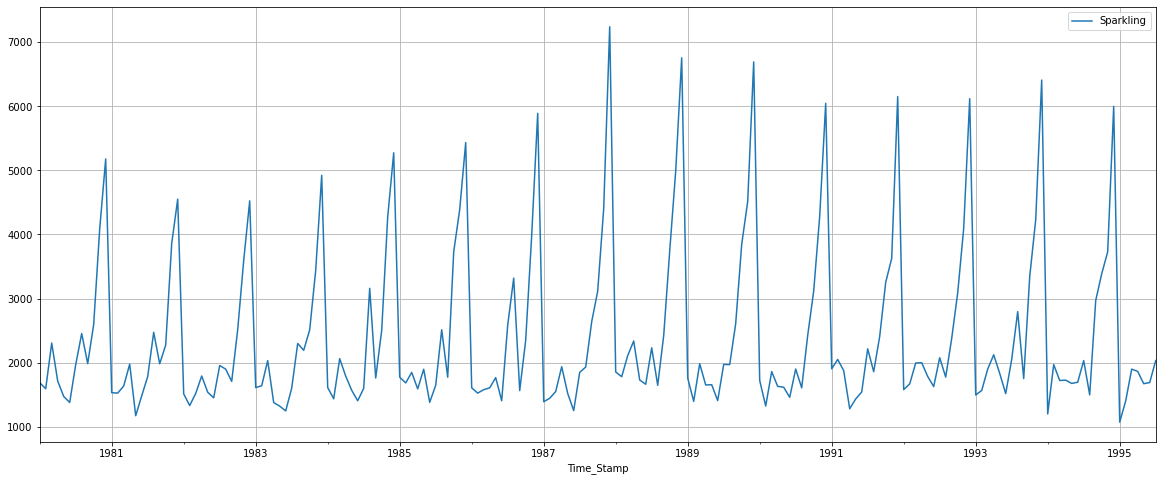

In [11]:
df.plot(figsize=(20,8))
plt.grid();

In [12]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


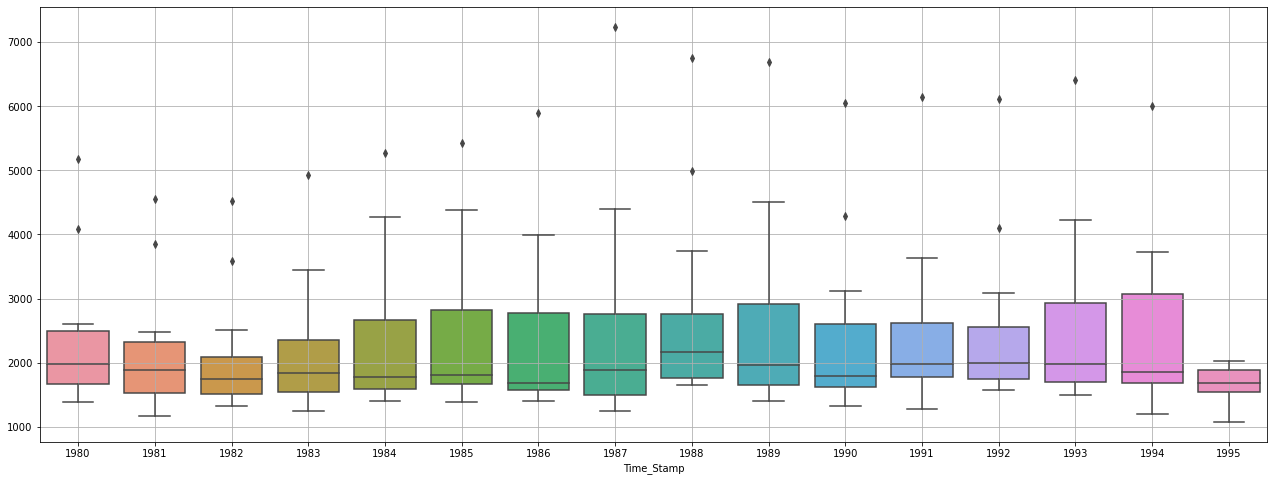

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

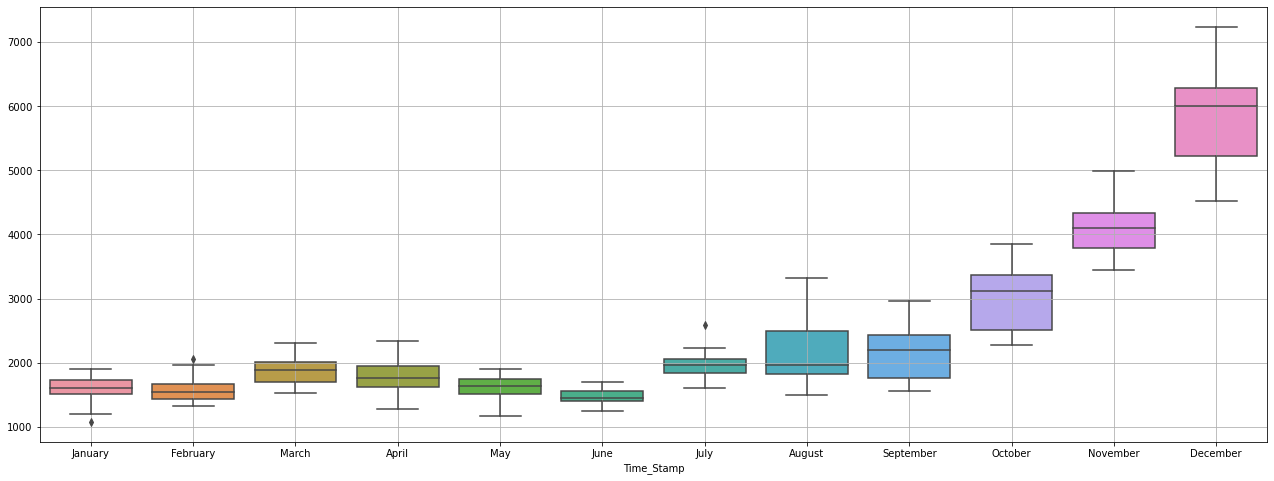

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


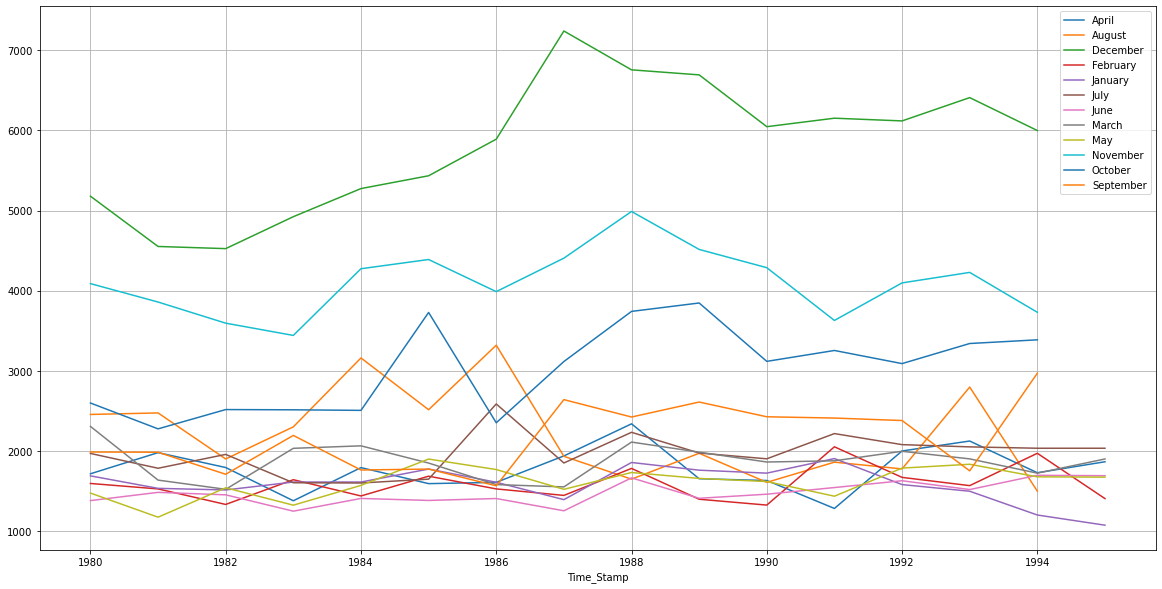

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

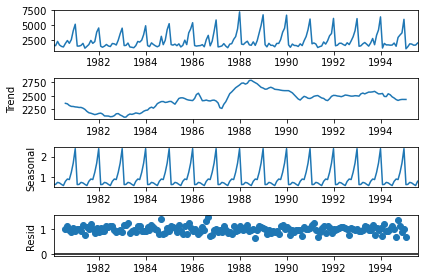

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

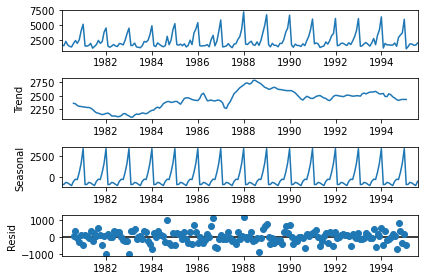

In [18]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df,model='addictive')
decomposition.plot();

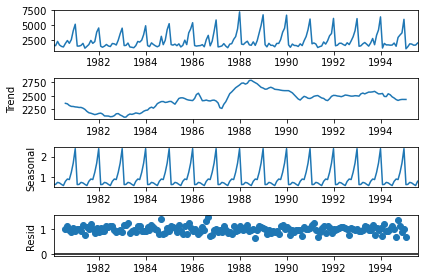

In [19]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [21]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [22]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [23]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



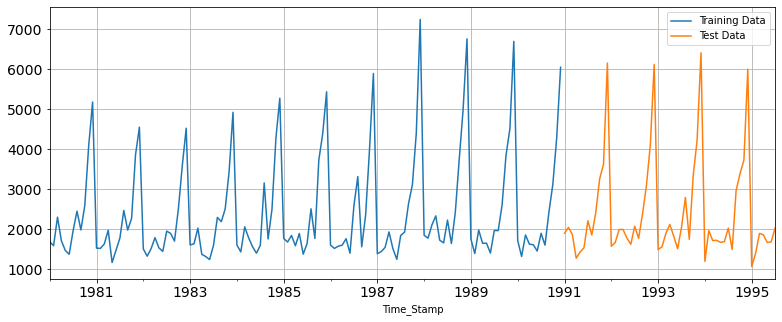

In [24]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [25]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [26]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [27]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

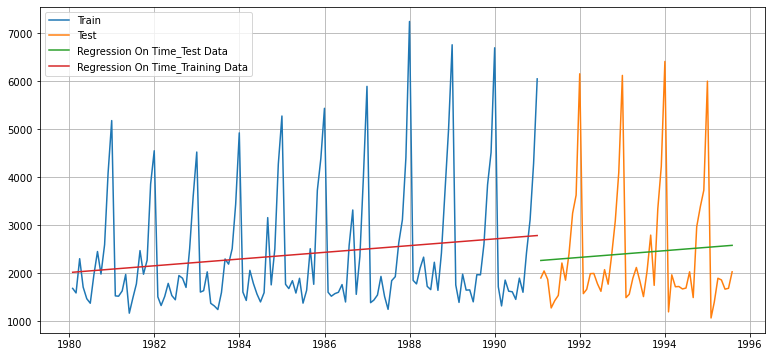

In [29]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [30]:
from sklearn import metrics
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [31]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [32]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867 MAPE is 39.16


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16


# Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [36]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

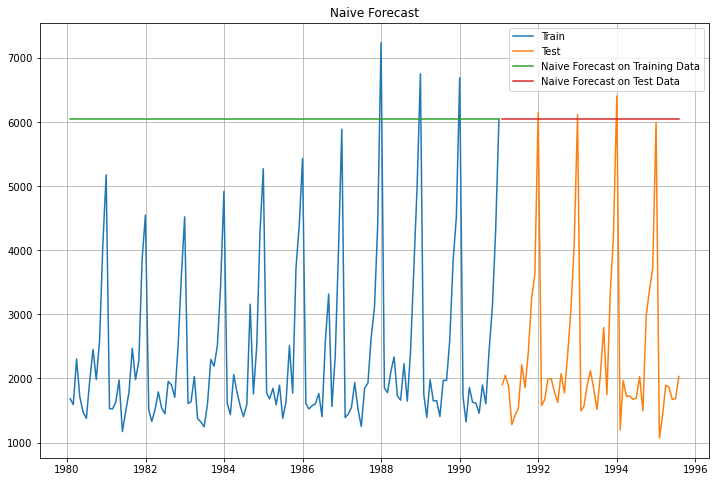

In [37]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [38]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [39]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [40]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87


# Method 3: Simple Average

In [41]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [42]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
Time_Stamp,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [43]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


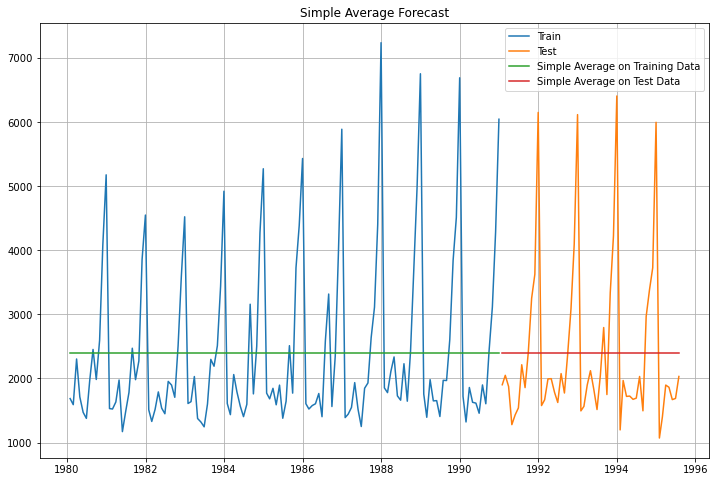

In [44]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [45]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [46]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [47]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90


# Method 4: Moving Average(MA)

In [48]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [49]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


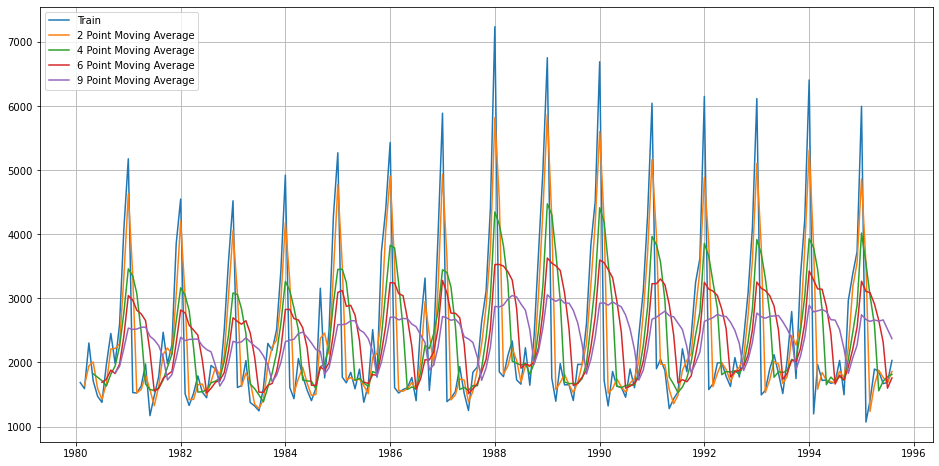

In [50]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [51]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

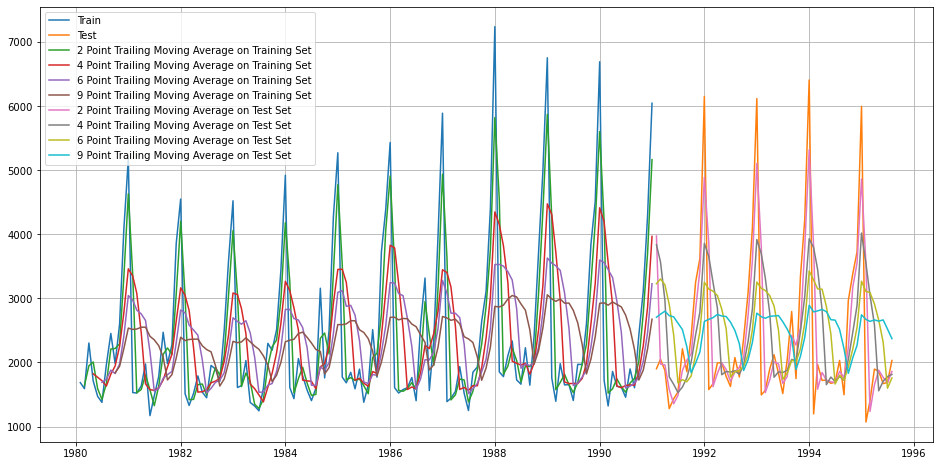

In [52]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [53]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 MAPE is 46.86


In [54]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86


# plot all the models and compare the Time Series plots

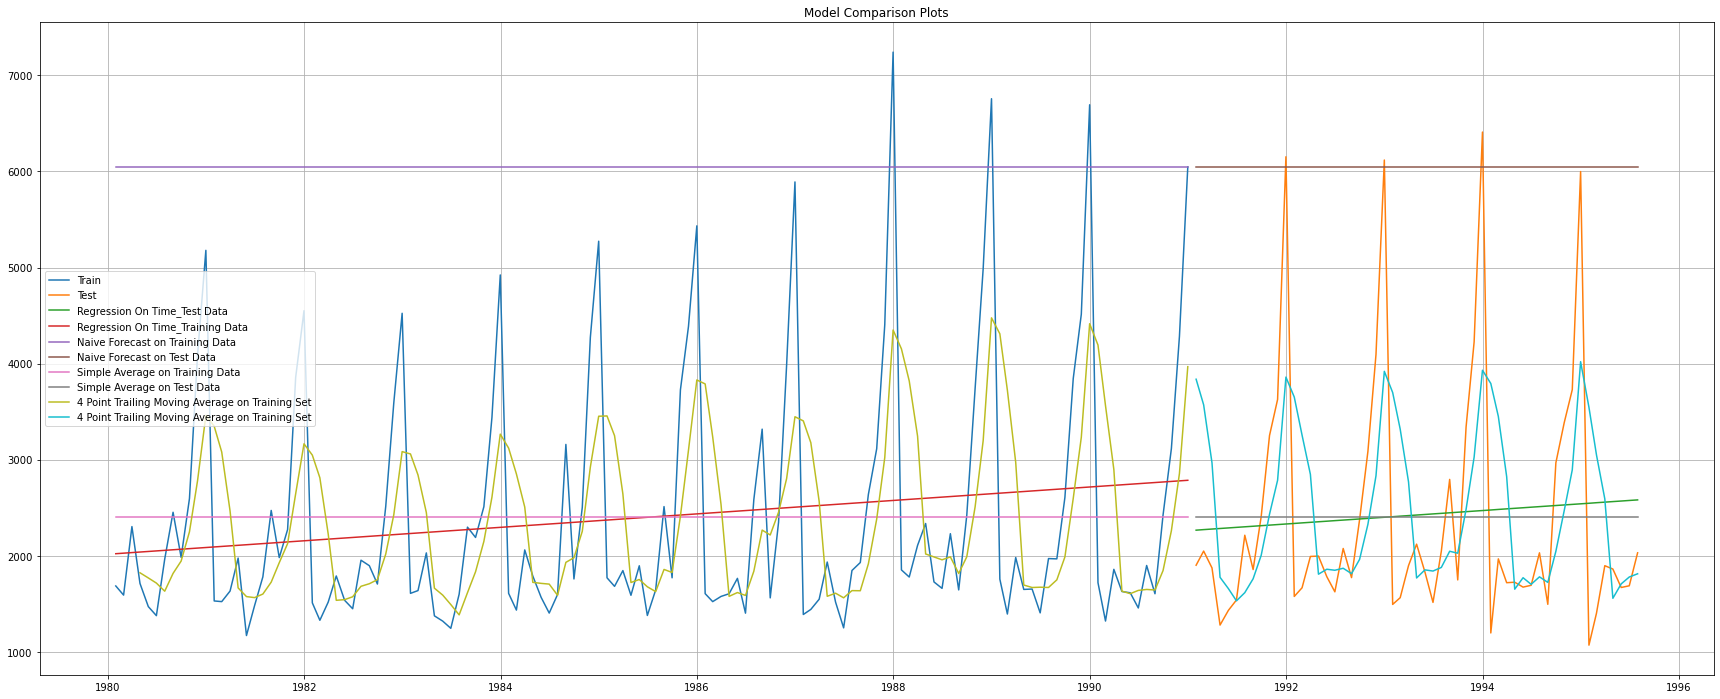

In [55]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5: Simple Exponential Smoothing

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [57]:
SES_train = train.copy()
SES_test = test.copy()

In [58]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [59]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [60]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sparkling,predict
Time_Stamp,,
1980-01-31,1686,2403.790103
1980-02-29,1591,2403.790103
1980-03-31,2304,2403.790103
1980-04-30,1712,2403.790103
1980-05-31,1471,2403.790103


In [62]:
len(SES_test)

55

In [63]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2403.790103
1991-02-28,2049,2403.790103
1991-03-31,1874,2403.790103
1991-04-30,1279,2403.790103
1991-05-31,1432,2403.790103


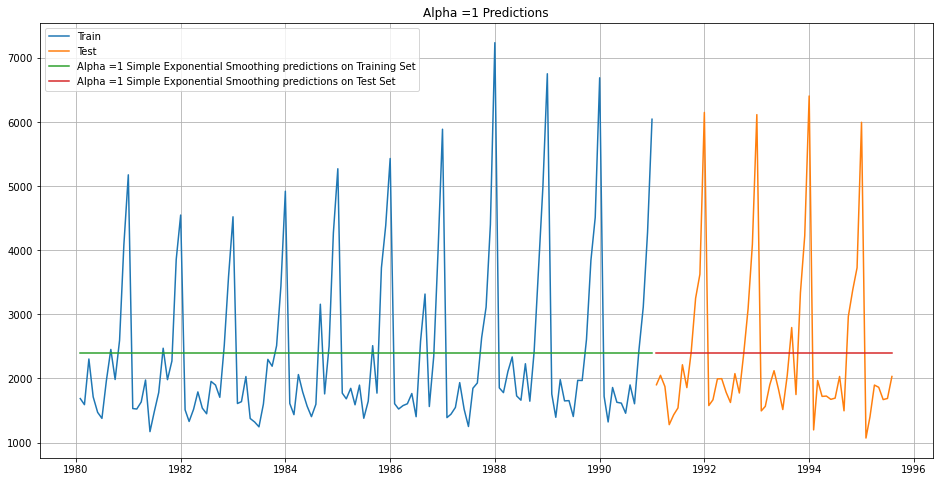

In [64]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

# Model Evaluation for 𝛼 = 1 : Simple Exponential Smoothing

In [65]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [66]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1275.082 MAPE is 38.90


In [67]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=1,SimpleExponentialSmoothing",1275.081839,38.90


In [68]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [70]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [71]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,1359.422161,43.80,1935.507132,75.66
1,0.4,1352.562367,42.79,2311.919615,91.55
2,0.5,1343.994119,41.18,2666.351413,106.27
3,0.6,1338.801428,39.81,2979.204388,118.77
4,0.7,1338.843297,38.56,3249.944092,129.34
5,0.8,1344.462034,37.60,3483.801006,138.34
6,0.9,1355.723493,36.79,3686.794285,146.08


In [72]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [73]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,1359.422161,43.80,1935.507132,75.66
1,0.4,1352.562367,42.79,2311.919615,91.55
2,0.5,1343.994119,41.18,2666.351413,106.27
3,0.6,1338.801428,39.81,2979.204388,118.77
4,0.7,1338.843297,38.56,3249.944092,129.34
5,0.8,1344.462034,37.60,3483.801006,138.34
6,0.9,1355.723493,36.79,3686.794285,146.08
7,0.3,1359.422161,43.80,1935.507132,75.66
8,0.4,1352.562367,42.79,2311.919615,91.55
9,0.5,1343.994119,41.18,2666.351413,106.27


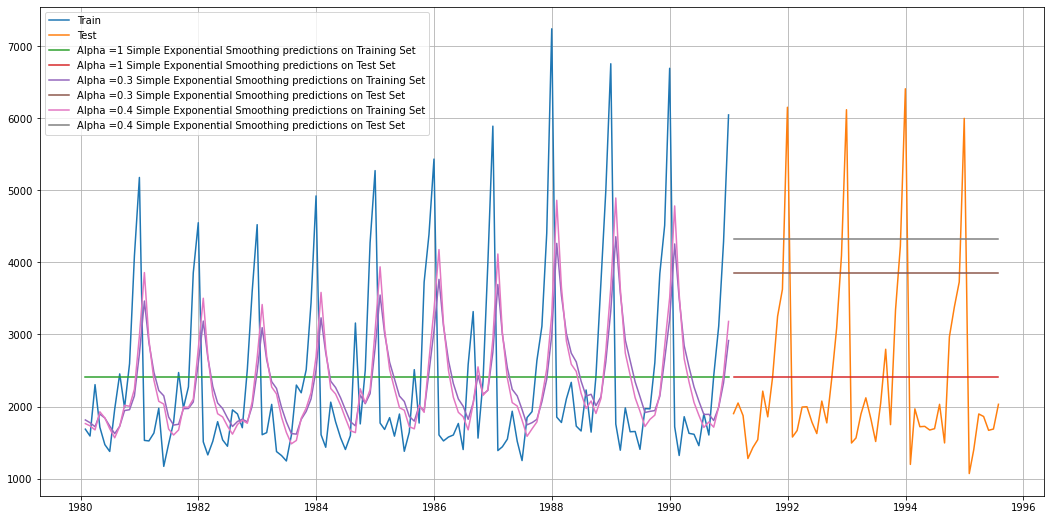

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [75]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=1,SimpleExponentialSmoothing",1275.081839,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55


# Method 6: Double Exponential Smoothing (Holt's Model)¶

In [76]:
DES_train = train.copy()
DES_test = test.copy()

In [77]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [78]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [79]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [80]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151687,53.80,18259.110704,675.28
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
2,0.3,0.5,1771.290968,59.94,34401.512440,1264.55
3,0.3,0.6,1848.583857,62.10,42162.748095,1548.94
4,0.3,0.7,1900.315419,62.91,47832.397419,1757.91
...,...,...,...,...,...,...
59,1.0,0.6,1753.362277,45.75,49327.087977,1824.42
60,1.0,0.7,1825.157068,47.96,52655.765663,1945.23
61,1.0,0.8,1901.992950,50.09,55442.273880,2046.36
62,1.0,0.9,1985.351410,52.00,57823.177011,2132.75


In [81]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151687,53.80,18259.110704,675.28
8,0.4,0.3,1568.527730,50.15,23878.496940,886.00
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
16,0.5,0.3,1530.223975,45.98,27095.532414,1007.39
24,0.6,0.3,1506.223120,42.82,29070.722592,1082.18


In [82]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1590.151687,53.80,18259.110704,675.28
8,0.4,0.3,1568.527730,50.15,23878.496940,886.00
1,0.3,0.4,1681.706138,57.15,26069.841401,960.18
16,0.5,0.3,1530.223975,45.98,27095.532414,1007.39
24,0.6,0.3,1506.223120,42.82,29070.722592,1082.18


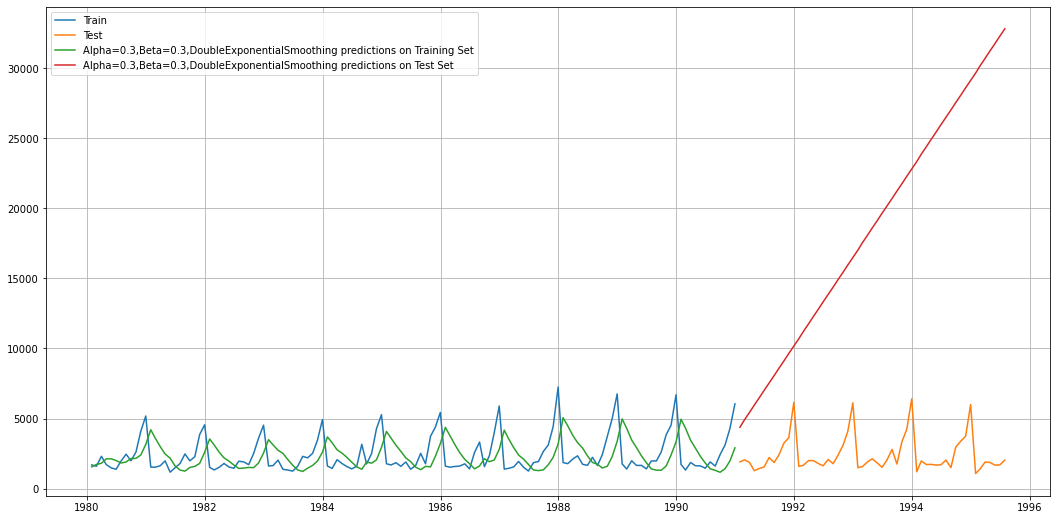

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [84]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=1,SimpleExponentialSmoothing",1275.081839,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)¶

In [85]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [88]:
model_TES_autofit = model_TES.fit()

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [89]:
model_TES_autofit.params

{'smoothing_level': 0.15422215345902165,
 'smoothing_slope': 2.6836273360597693e-21,
 'smoothing_seasonal': 0.37132238239976756,
 'damping_slope': nan,
 'initial_level': 1639.9993318334934,
 'initial_slope': 4.848983218641197,
 'initial_seasons': array([1.00842014, 0.96898448, 1.24179403, 1.1320575 , 0.93981009,
        0.93811201, 1.2245818 , 1.54428852, 1.27336069, 1.6319816 ,
        2.48292921, 3.11861884]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
Time_Stamp,,
1980-01-31,1686,1658.698167
1980-02-29,1591,1602.576960
1980-03-31,2304,2057.502579
1980-04-30,1712,1915.827715
1980-05-31,1471,1568.940140


In [91]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1602.190344
1991-02-28,2049,1373.887030
1991-03-31,1874,1807.440446
1991-04-30,1279,1704.576312
1991-05-31,1432,1602.379889


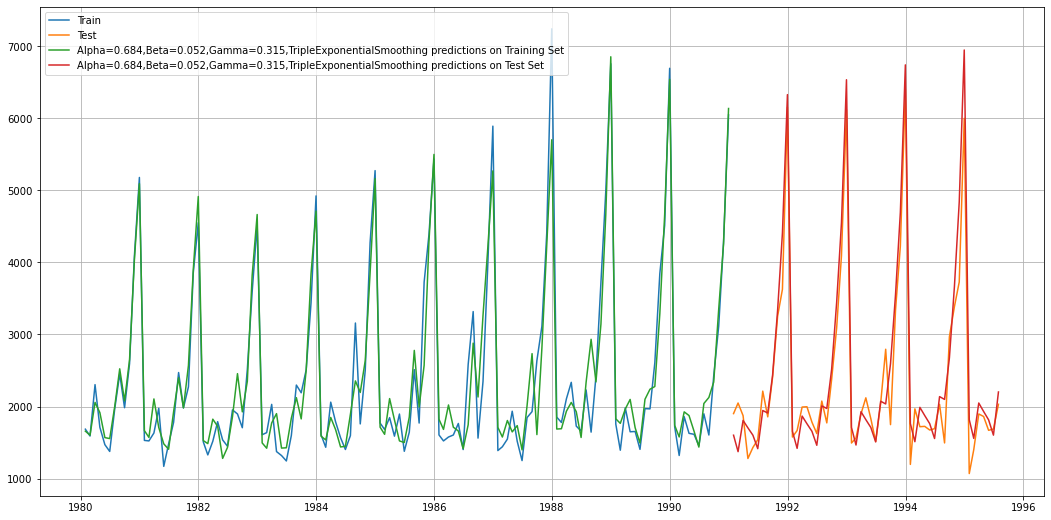

In [92]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 353.379 MAPE is 10.17


In [94]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.192 MAPE is 11.91


In [95]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=1,SimpleExponentialSmoothing",1275.081839,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


In [96]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [97]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

In [98]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,3.447399e+02,11.12
1,0.3,0.3,0.4,397.509631,11.32,8.288459e+02,28.71
2,0.3,0.3,0.5,407.454445,11.13,1.454723e+03,49.75
3,0.3,0.3,0.6,425.506183,11.46,2.076636e+03,70.02
4,0.3,0.3,0.7,465.544707,12.46,3.387272e+03,111.47
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,133843.577353,1201.52,8.243499e+05,18085.61
508,1.0,1.0,0.7,93702.665038,1031.69,1.397222e+06,25633.70
509,1.0,1.0,0.8,104691.065082,1039.56,3.959306e+06,55483.05
510,1.0,1.0,0.9,153710.350473,1385.15,5.642231e+05,8676.89


In [99]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,344.739889,11.12
66,0.4,0.3,0.5,438.072507,12.00,413.543939,14.30
8,0.3,0.4,0.3,424.736193,11.71,420.260362,13.10
464,1.0,0.5,0.3,702.602048,19.87,587.057915,21.58
409,0.9,0.6,0.4,843.777272,21.61,610.232508,18.80


In [100]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,392.359638,11.53,344.739889,11.12
8,0.3,0.4,0.3,424.736193,11.71,420.260362,13.10
66,0.4,0.3,0.5,438.072507,12.00,413.543939,14.30
409,0.9,0.6,0.4,843.777272,21.61,610.232508,18.80
134,0.5,0.3,0.9,890.738250,21.54,624.610927,21.50


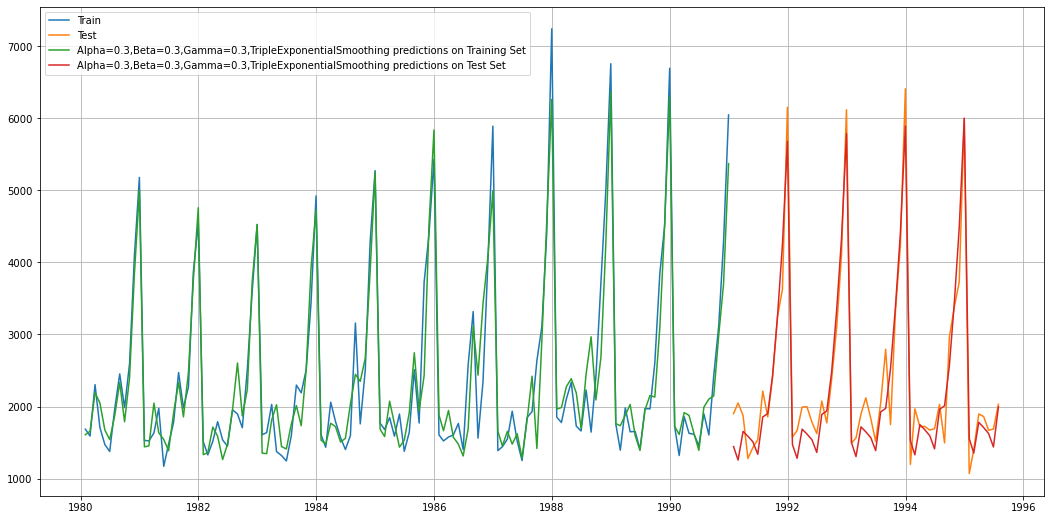

In [106]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [107]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][66]],'Test MAPE':[resultsDf_8_2['Test MAPE'][66]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1275.867052,39.16
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=1,SimpleExponentialSmoothing",1275.081839,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


In [108]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    383.192343      11.91
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...    413.543939      14.30
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...    413.543939      14.30
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    413.543939      14.30
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    413.543939      14.30
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
Alpha=1,SimpleExponentialSmoothing                   1275.081839      38.90
RegressionOnTime                                     1275.867052      39.16
6pointTrailingMovingAverage                          1283.927428      43.86
Alpha=0.3,SimpleExponentialSmoothing          

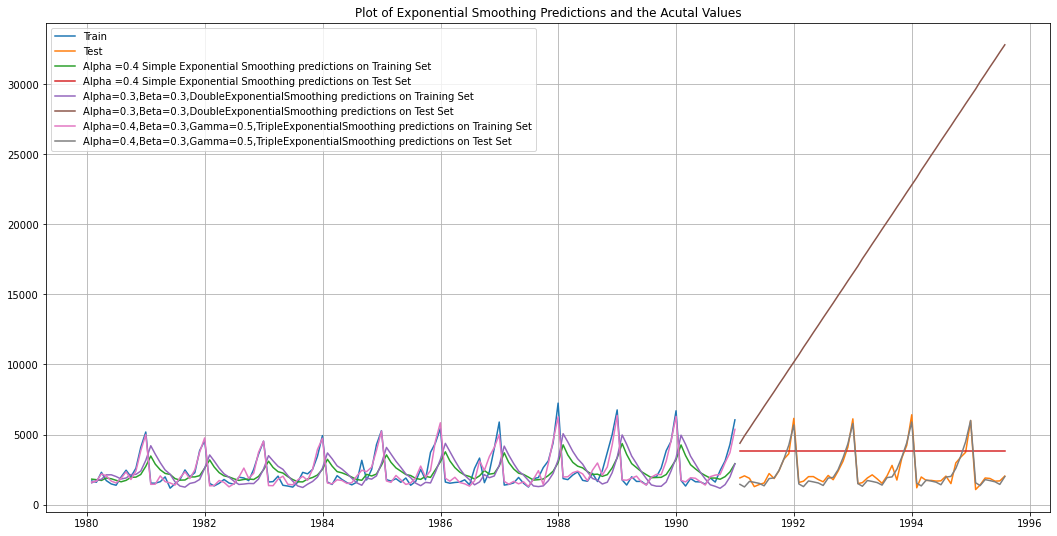

In [110]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.3, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');